In [1]:
import numpy as np
import pandas as pd

In [2]:
# df = pd.read_csv('spam.csv', encoding='utf-8')
df = pd.read_csv('spam_ham_dataset.csv', encoding='utf-8')

In [3]:
df.sample(5)

,Unnamed: 0,label,text,label_num
2341,1537,ham,"Subject: re : cornhusker deal\r\nrita ,\r\nthi...",0
1826,3817,spam,Subject: hi paliourg software cds 15 and 99 ge...,1
4220,2512,ham,Subject: point change for deals\r\nfyi - - - i...,0
4131,1195,ham,Subject: new paycheck information !\r\nintrodu...,0
3190,2162,ham,Subject: cynergy ( apache )\r\nstacey / daren ...,0


In [4]:
df.shape

(5171, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


## 1. Data Cleaning

In [6]:
df.drop(columns= ['Unnamed: 0' , 'label_num'] , inplace=True)

In [7]:
df.sample(5)

,label,text
3618,spam,Subject: can we go over guillermo ' s budget t...
2479,ham,"Subject: re : deal 34342\r\ndaren ,\r\ni am tr..."
1276,spam,Subject: 18 yearold cocksuckers !\r\ndownload ...
4620,spam,"Subject: rolex , cartier , piaget replicas - e..."
3960,ham,Subject: thanks ! !\r\njust a note to tell eac...


In [8]:
df.rename(columns={'label':'target'}, inplace=True)

In [9]:
df.sample(5)

,target,text
689,ham,"Subject: hpl nom for july 13 , 2000\r\n( see a..."
94,spam,Subject: young sluts had sex for tewnty bucks\...
123,ham,Subject: hpl meter # 980417 hpl / kmid - seven...
4535,spam,Subject: ulalaaa . . . mizl\r\nwanna see girls...
1253,spam,Subject: neuro tests start january 23 th\r\nch...


In [10]:
!pip install jedi ipython

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
4693,1,Subject: expect to see a reduction in spending...
1255,0,Subject: re : hplc / ocean energy inc . 09 / 9...
3972,0,Subject: re : chevron - winter\r\nits a monthl...
1717,0,Subject: re : howdy\r\ni am doing well . i jus...
1816,0,"Subject: re : october wellhead\r\njulie ,\r\nt..."


In [14]:
df.duplicated().sum()

178

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(4993, 2)

In [18]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [19]:
df['target'].value_counts()

target
0    3531
1    1462
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21a06e7db90>,
 [Text(-0.6664987604061641, 0.8750882254818922, 'ham'),
  Text(0.6664986784744886, -0.8750882878840056, 'spam')],
 [Text(-0.3635447784033622, 0.4773208502628502, '70.72'),
  Text(0.36354473371335744, -0.4773208843003666, '29.28')])

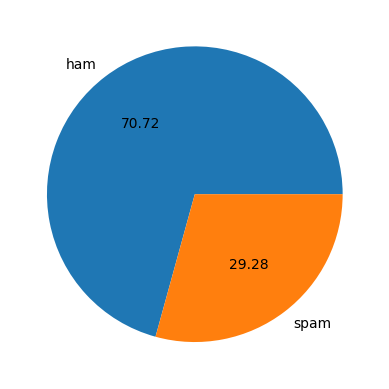

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct='%0.2f')

In [21]:
df['num_characters'] = df['text'].apply(len)
df.sample(5)

,target,text,num_characters
4350,0,"Subject: enron / hpl actuals for august 21 , 2...",131
873,1,Subject: this was the one recommended to me\r\...,1352
689,0,"Subject: hpl nom for july 13 , 2000\r\n( see a...",93
4495,0,Subject: 01 / 00 natural gas nomination\r\nenr...,456
79,0,Subject: @ ect . enron . com email notificatio...,919


In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.sample(5)

,target,text,num_characters,num_words
4106,0,"Subject: well head\r\ndaren "" you new dad "" i ...",753,210
2298,0,Subject: re : discrepancies in price of gas re...,95,18
1010,1,Subject: fwd : any meds u want . xan @ x . val...,421,115
4959,1,Subject: get real results with real v / agra 5...,833,201
1274,0,"Subject: hpl nom for dec . 14 , 2000\r\n( see ...",96,25


In [26]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
5049,0,Subject: revised 7 th noms\r\n- - - - - - - - ...,454,144,15
2655,0,Subject: global data management - gas asset su...,1315,197,8
3442,0,Subject: tetco change\r\n- - - - - - - - - - -...,317,104,3
4776,1,Subject: here u can buy soft . ware at che - a...,1401,330,25
1031,0,Subject: ( no subject )\r\nhey daren its me .\...,105,27,6


In [28]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [29]:
df[df['target'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [30]:
import seaborn as sns

C:\Users\D4rkDemian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D4rkDemian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\D4rkDemian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D4rkDemian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

<Axes: xlabel='num_characters', ylabel='Count'>

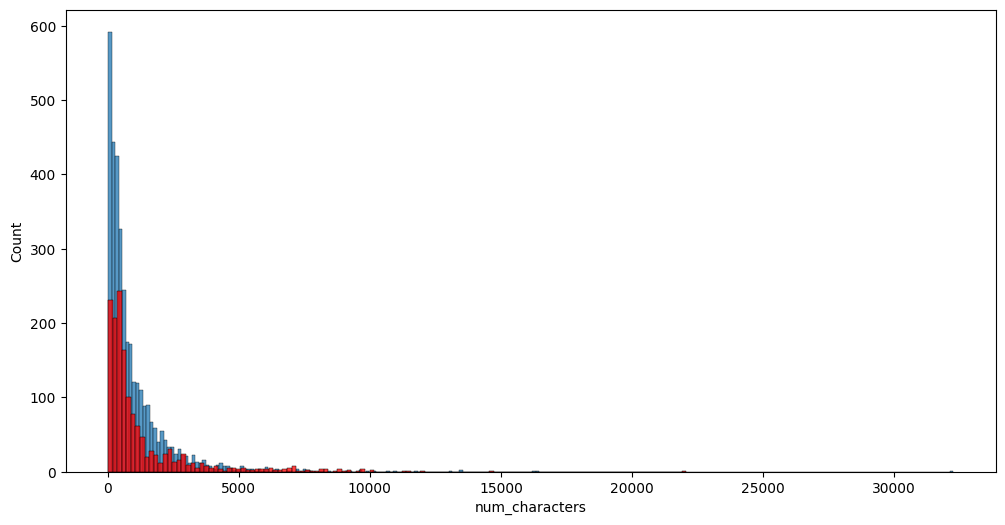

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'] , color="red")

## 2. Data Preprocessing 
 - Lower Case
 - Tokenization
 - Removing special characters
 - Removing stopwords and punctuations
 - Stemming

In [32]:
words = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [35]:
def transform_text(text):
    text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in words and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [36]:
transform_text('Hi how are you?%10 Hitesh.I love YT videos on Machine Learning and dancing, what about you?')

'hi 10 love yt video machin learn danc'

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [39]:
!pip install wordcloud

In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500, min_font_size=10, background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

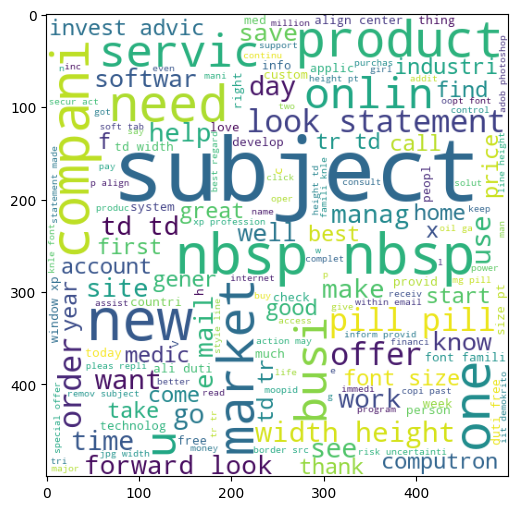

In [42]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

## 3. Model Building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [44]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
X

array([[0.11212774, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.12398632, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
X.shape

(4993, 42592)

In [47]:
y = df['target'].values

In [48]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.svm import SVC
svc = SVC(kernel='poly' , gamma=1.0)

In [52]:
from sklearn.naive_bayes import MultinomialNB
# Defining our model
clf = MultinomialNB()

In [53]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
print('Accuracy score for MultinomialNB: ' , accuracy)
print('Precision score for MultinomialNB: ' , precision)

Accuracy score for MultinomialNB:  0.908908908908909
Precision score for MultinomialNB:  0.9953051643192489


In [54]:
# svc.fit(X_train,y_train)
# y_pred = svc.predict(X_test)
# accuracy = accuracy_score(y_test , y_pred)
# precision = precision_score(y_test , y_pred)

In [55]:
# print('Accuracy Score: ' , accuracy)
# print('Prediction Score: ' , precision)

In [56]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(clf , open('model.pkl' , 'wb'))